# Topic 42: Tuning Neural Networks

- 06/08/21
- onl01-dtsc-ft-022221

> NOTE: YOU MAY **NOT** USE THE FUNCTIONS FROM THIS NOTEBOOK IN YOUR PROJECTS

## Learning Objectives

- Discuss the different options available for tuning neural networks
- Discuss some rules of thumb for tuning Neural Networks

- **ACTIVITY: Use a computer vision task to walk-through hyperparameter tuning (cats vs dogs)**
    - [Zip File on Google Drive](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)

- **Learn how to use GridSearchCV with Keras neural neural networks.**

    - Learn how to examine the other parameter results from a GridSearchCV object.

    - Learn how to create your own custom scorer for sklearn (and why you'd want to)
- Learn how to set up email notifications via Python (for gridsearch results)


## Questions/Comments?
-

# Overview  - Neural Network Tuning 

## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### Dealing with Bias/Variance

- Balancing Bias/Variance:
    - High Bias models are **underfit**
    - High Variance models are **overfit**



- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is roughly laid out in order of importance/what-to-tune-first
    - [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters (For Dense layers)

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons


7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout

### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categorical cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- **can also uses custom scoring functions**

## Using Regularization

### L1 & L2 Regularlization
- These methods of regularizaiton do so by penalizing coefficients(regression) or weights(neural networks),
    - L1 & L2 exist in regression models as well. There, L1='Lasso Regressions' , L2='Ridge regression'
    
    

- **L1 & L2 regularization add a term to the cost function.**

$$Cost function = Loss (say, binary cross entropy) + Regularization term$$

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$
- where $\lambda$ is the regularization parameter. 

- **The difference between  L1 vs L2 is that L1 is just the sum of the weights whereas L2 is the sum of the _square_of the weights.**  


<br><br>
- **L1 Regularization:**
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||$$
    - Uses the absolute value of weights and may reduce the weights down to 0. 
    
        
- **L2 Regularization:**:
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||^2$$
    - Also known as weight decay, as it forces weights to decay towards zero, but never exactly 0.. 

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

### Additional Options

#### Dropout 

#### Early Stopping

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


# Activity: Dogs vs Cats

- Build an image classification model to classify images of cats vs dogs

## Installs, Imports, & Functions

In [1]:
# !pip install -U tensorflow
from tensorflow.random import set_seed
set_seed(321)

import numpy as np
np.random.seed(321)

import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.0'

In [1]:
## Import the usual suspects (notice the mpl import)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
import os,glob,sys
# print(os.path.abspath(os.curdir))


## (Down)Loading the data

- Download the zip file of cat vs dog images. 
    - [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- Extract zip file contents to the a folder on your computer.
    - I am using my user folder > Datasets > cats-vs-dogs
    - **Change the `BASE_FOLDER` variable below to match the location of the unzipped folder on your local machine**

In [4]:
# change dataset_folder to match where you stored the files
BASE_FOLDER = "/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"
os.makedirs(BASE_FOLDER,exist_ok=True)
os.listdir(BASE_FOLDER)

['single_prediction', '.DS_Store', 'Models', 'training_set', 'test_set']

In [5]:
## Specify the names of the training folder and test folder
train_folder = BASE_FOLDER+"training_set/"
test_folder = BASE_FOLDER+"test_set/"
# val_folder = BASE_FOLDER+"val/"
print(os.listdir(train_folder))

['dogs', 'cats', '.DS_Store']


## Using ImageDataGenerator.flow_from_directory

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

> Train-Test-Val Split: https://medium.com/@olagokeibrahim165/split-train-data-into-training-and-validation-when-using-imagedatagenerator-in-keras-ffdc88bbf6f3

# BOOKMARK 06/06: Change workflow to use normal batch sizes, but with a loop

In [4]:
# ## get num images
# import os,glob
# def get_num_images(train_folder, folders=['dogs','cats'],verbose=True):
#     """Gets the total number of images from all folders listed"""
#     num_images = 0
#     for folder in folders:
#         num_in_folder = len(os.listdir(train_folder+folder))
        
#         if verbose:
#             print(f"- There are {num_in_folder} images in {folder} folder.")
#         num_images+=num_in_folder
#     return num_images

In [3]:
# import os,glob

# ## Using glob to get the number of training images in the dogs and cats folders
# train_filepaths = glob.glob(f"{train_folder}/*/*jpg")
# BATCH_SIZE_TRAIN = len(train_filepaths)
# print(f"There are {BATCH_SIZE_TRAIN} # of images in {train_folder}.")

# test_filepaths = glob.glob(f"{test_folder}/*/*jpg")
# BATCH_SIZE_TEST_VAL = len(test_filepaths)
# print(f"There are {BATCH_SIZE_TEST_VAL} # of images in {test_folder}.")

In [16]:
# # ## Get the Number of total images for batch size 
# BATCH_SIZE_TRAIN = get_num_images(train_folder,verbose=0)
# BATCH_SIZE_TEST_VAL = get_num_images(test_folder,verbose=0)
# print(f"Training images: {BATCH_SIZE_TRAIN}")
# print(f"Test & Val images: {BATCH_SIZE_TEST_VAL}")

In [2]:
# #### INEFFICIENT USE OF IMAGEDATAGENERATOR - LOADS ENTIRE DATASET AT ONCE 
# ### We are only doing this to be able to get a version of our dataset for Dense layers

# ## Calculate validation split size - to make 
# VAL_SPLIT = 0.2
# IMG_SIZE = (128,128)

# ## Calculate the number of images after a validation split
# BATCH_SIZE_VAL = round(BATCH_SIZE_TEST_VAL*VAL_SPLIT)
# BATCH_SIZE_TEST = round(BATCH_SIZE_TEST_VAL*(1-VAL_SPLIT))

# ## MAKING IMAGE DATA GENERATORS FOR TRAIN TEST VAL

# ## Create ImageDataGenerator for training data
# train_datagen_full = ImageDataGenerator(rescale = 1./255)#,
# #                                    shear_range = 0.2, zoom_range = 0.2,
# #                                    horizontal_flip = True)

# ## Create ImageDataaGenerator for validation and test data
# test_val_datagen_full = ImageDataGenerator(rescale = 1./255,
#                                       validation_split=VAL_SPLIT)



# ## Make Training Sets With All Images
# training_set_full = train_datagen_full.flow_from_directory(train_folder,
#                                                  target_size=IMG_SIZE,
#                                                    batch_size=BATCH_SIZE_TRAIN,
# #                                                       class_mode='binary'
#                                                           )                                                  
                                                      
# ## Makng a Test Set and validation set from the same folder.
# test_set_full = test_val_datagen_full.flow_from_directory(test_folder,
#                                                      target_size=IMG_SIZE,
#                                                      subset='training',
#                                                      batch_size=BATCH_SIZE_TEST,
# #                                                     class_mode='binary'
#                                                          )


# val_set_full = test_val_datagen_full.flow_from_directory(test_folder,target_size=IMG_SIZE,
#                                                    subset='validation',
#                                                     batch_size=BATCH_SIZE_VAL,
# #                                                    class_mode='binary'
#                                                         )



In [19]:
## MAKE X and YS FROM GENERATORS
X_train, y_train=next(training_set_full)
y_train.shape,X_train.shape

((8000, 2), (8000, 128, 128, 3))

In [20]:
# TEST AND VAL SETS
X_test, y_test=next(test_set_full)
X_val,y_val = next(val_set_full)

In [21]:
## UNROW IMAGES FOR SEQUENTIAL MODEL
X_train_unrow = X_train.reshape(X_train.shape[0],-1)
X_test_unrow = X_test.reshape(X_test.shape[0],-1)
X_val_unrow = X_val.reshape(X_val.shape[0],-1)
X_train_unrow.shape

(8000, 49152)

In [22]:
## Delete non-unrowed X vars for memory
del X_train, X_test, X_val

In [23]:
## Can reshape an individual image
ex_reshaped_X = X_train_unrow[0].reshape((*IMG_SIZE,3))
ex_reshaped_X.shape

(128, 128, 3)

array([0., 1.], dtype=float32)

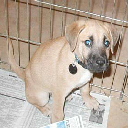

In [24]:
## Display a random 
i = np.random.choice(range(len(y_train)))

display(y_train[i])
array_to_img(X_train_unrow[i].reshape((*IMG_SIZE,3)))

# Using Dense Networks

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras import models,layers,optimizers,regularizers,activations
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout


def evaluate_network(model, X_test,y_test,history=None,
                     X_train = None, y_train = None,
                     cmap='Greens', normalize='true',
                     classes=None,cm_figsize=(8,8), 
                     metrics_list=['acc','loss']):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model (classifier): a fit keras classification model.
        X_test (tensor/array): X data
        y_test (Tensor/Array): y data
        history (History object): model history from .fit
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.
        classes (list, optional): List of class names for display. Defaults to None.
        figsize (tuple, optional): figure size Defaults to (8,4).
        
        X_train (Frame or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
    """
    
    header =  '==='*24
    ## First, Plot History, if provided.
    if history is not None:
        print(header,'\t[i] MODEL HISTORY',header,sep='\n')

        ## Make a dataframe out of history
        res_df = pd.DataFrame(history.history)#.plot()

        ## Plot Losses
        plot_kws = dict(marker='o',ls=':')
        
        ## Plot all metrics
        metrics_list = model.metrics_names
        for metric in metrics_list:
            ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
            ax.set(xlabel='Epoch',ylabel=metric,title=metric)
            ax.grid()
            ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
            plt.show()
           
        
    ## Evaluate Network for loss/acc scores
    try:
        print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
        if X_train is not None:
            train_loss, train_acc  = model.evaluate(X_train,y_train)#score()
     
        ## Get Test Accuracy
        test_loss,test_acc = model.evaluate(X_test,y_test)
        
        if X_train is not None:
            print(f"\tTraining Accuracy: {train_acc:.3f}")
        print(f"\tTest Accuracy: {test_acc:.3f}")
        print()
        
    except Exception as e:
        print("Error evaluating for accuracy:")
        print(e)
        
        

    
     ## Evaluate training data with sklearn
    if X_train is not None:
        
        ## Print report header, get preds, get class report, and conf matrix
        print(header,"\t[i] CLASSIFICATION REPORT - TRAINING DATA",
              header,sep='\n')
        y_hat_train = model.predict(X_train)
        y_train_class =y_train.argmax(axis=1)
        y_hat_train_class = y_hat_train.argmax(axis=1)
        print(metrics.classification_report(y_train_class,y_hat_train_class))
        print()
        cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
                                      normalize='true')

        ## Plot the confusion Matrix
        fig,ax = plt.subplots(figsize=cm_figsize)
        sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
        ax.set(ylabel='True Class',xlabel='Predicted Class',
               title='Confusion Matrix - Training Data')    
        plt.show()
        
        print('\n'*2)
        
    ## Test Data - Print report header, get preds, get class report, and conf matrix
    y_test_class =y_test.argmax(axis=1)
    y_hat_test = model.predict(X_test)
    y_hat_test_class = y_hat_test.argmax(axis=1)
    
    print(header,"\t[i] CLASSIFICATION REPORT -  TEST DATA",header,sep='\n')
    print(metrics.classification_report(y_test_class,y_hat_test_class))

     ## Get the confusion matrix 
    print()
    cm = metrics.confusion_matrix(y_test_class, y_hat_test_class,normalize='true')
    ## Plot the confusion Matrix
    fig,ax = plt.subplots(figsize=cm_figsize)
    sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
    ax.set(ylabel='True Class',xlabel='Predicted Class',
           title='Confusion Matrix - Test Data') 
    plt.show()

In [30]:
# res_df = pd.DataFrame(history.history)
# res_df

In [ ]:
# ## calculate how many axes to delete in the last row
# num_to_del = num_metrics%nrows

# for i in range(0,num_to_del):
#     print(i)

In [27]:
## get needed shape info
input_img_shape = X_train_unrow[0].shape
print(f"Single image shape: {input_img_shape}")

## get n_classes
n_classes = y_train.shape[1]
print(f"# of columns in target: {n_classes}")

Single image shape: (49152,)
# of columns in target: 2


In [28]:
def build_model():
    ## Make a Sequential Model
    model = models.Sequential()
    ## Hidden layer of 10 units with relu activation function
    model.add(layers.Dense(64,activation='relu', input_shape=input_img_shape))
    model.add(layers.Dense(32,activation='relu'))#, input_shape=train_images_unrow[0].shape))

    ## Add final layer with n_classes # of neurons and activation='softmax'
    model.add(layers.Dense(n_classes, activation='softmax'))

    ## Compile with optimer as adam, loss as categorical_crossentropy, and accuracy as metric

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy',tf.keras.metrics.Recall(name='recall')])

    ## Display model summary
    display(model.summary())
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 3,147,938
Trainable params: 3,147,938
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
250/250 [==============================] - 4s 14ms/step - loss: 1.8732 - accuracy: 0.5350 - recall: 0.5350 - val_loss: 0.7339 - val_accuracy: 0.5600 - val_recall: 0.5600
Epoch 2/10
250/250 [==============================] - 3s 12ms/step - loss: 0.8281 - accuracy: 0.5676 - recall: 0.5676 - val_loss: 1.3085 - val_accuracy: 0.5025 - val_recall: 0.5025
Epoch 3/10
250/250 [==============================] - 3s 12ms/step - loss: 0.7623 - accuracy: 0.5743 - recall: 0.5743 - val_loss: 0.7633 - val_accuracy: 0.5275 - val_recall: 0.5275
Epoch 4/10
250/250 [==============================] - 3s 12ms/step - loss: 0.6554 - accuracy: 0.6268 - recall: 0.6268 - val_loss: 0.8919 - val_accuracy: 0.5125 - val_recall: 0.5125
Epoch 5/10
250/250 [==============================] - 3s 12ms/step - loss: 0.6702 - accuracy: 0.6099 - recall: 0.6099 - val_loss: 0.6742 - val_accuracy: 0.5900 - val_recall: 0.5900
Epoch 6/10
250/250 [==============================] - 3s 12ms/step - loss: 0.6580 - accuracy: 0

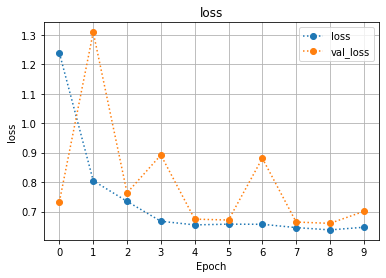

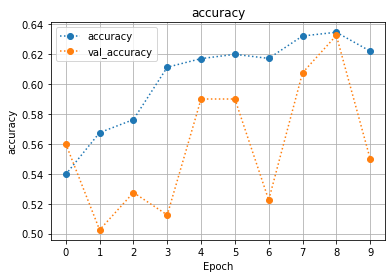

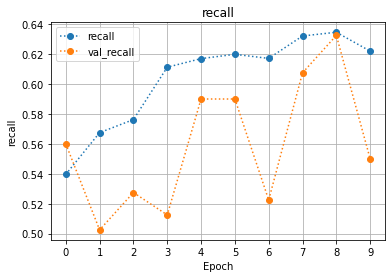

	[i] EVALUATING MODEL
250/250 [==============================] - 1s 4ms/step - loss: 0.6526 - accuracy: 0.6046 - recall: 0.6046
Error evaluating for accuracy:
too many values to unpack (expected 2)
	[i] CLASSIFICATION REPORT - TRAINING DATA
              precision    recall  f1-score   support

           0       0.79      0.29      0.42      4000
           1       0.56      0.92      0.70      4000

    accuracy                           0.60      8000
   macro avg       0.68      0.60      0.56      8000
weighted avg       0.68      0.60      0.56      8000




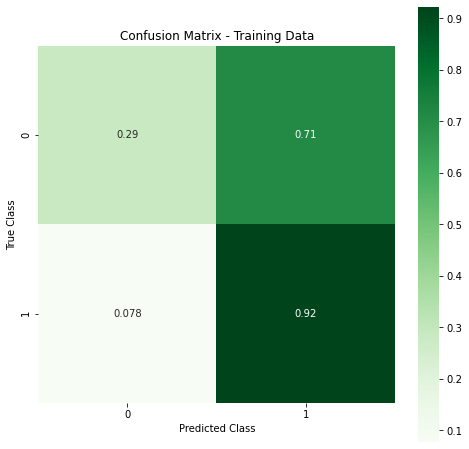




	[i] CLASSIFICATION REPORT -  TEST DATA
              precision    recall  f1-score   support

           0       0.74      0.29      0.42       800
           1       0.56      0.90      0.69       800

    accuracy                           0.60      1600
   macro avg       0.65      0.60      0.55      1600
weighted avg       0.65      0.60      0.55      1600




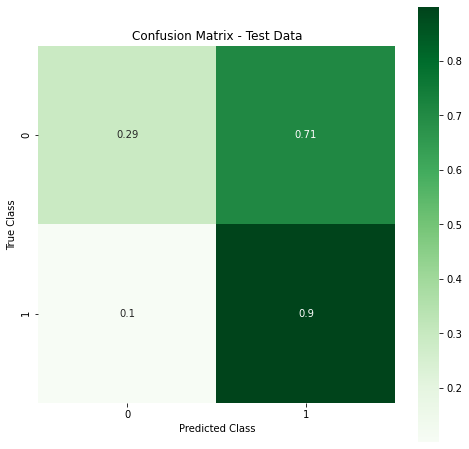

In [43]:
## Fit an initial model
model_1 = build_model()

history = model_1.fit(X_train_unrow,y_train, epochs=10,
                      validation_data=(X_val_unrow,y_val))

evaluate_network(model_1, X_test_unrow,y_test,history=history,
                 X_train = X_train_unrow, y_train = y_train )

In [131]:
### BREAKING OUR BIG FUNCTION UP INTO HELPER FUNCTIONS
def plot_history(history,model,figsize=(8,4)):
    """Takes a keras history and model and plots 
    all metrics in separate plots for each metric"""
#     print(header,'\t[i] MODEL HISTORY',header,sep='\n')

    ## Make a dataframe out of history
    res_df = pd.DataFrame(history.history)#.plot()

    ## Plot Losses
    plot_kws = dict(marker='o',ls=':',lw=2,figsize=figsize)

    ## Plot all metrics
    metrics_list = model.metrics_names

    for metric in metrics_list:
        ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
        ax.set(xlabel='Epoch',ylabel=metric,title=metric)
        ax.grid()
        ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
        plt.show()

        
def evaluate_scores(model,X_train,y_train,label='Training',verbose=0):
    """Evaluates a keras model and prints the scores using the provided label."""
    train_scores  = model.evaluate(X_train,y_train,verbose=verbose)#score()
    for i,metric in enumerate(model.metrics_names):
        print(f"\t{label} {metric}: {train_scores[i]:.3f}")
        
    
def classification_report_cm(model, X_train,y_train,label='TRAINING DATA',
                            cm_figsize=(6,6),normalize='true',cmap='Greens'):
    """Gets predictions from a Keras neural network and get 
    classification report and confusion matrix."""
    ## Print report header, get preds, get class report, and conf matrix
    header =  '==='*24
    print(header,f"\t[i] CLASSIFICATION REPORT - {label}",header,sep='\n')
    print()
    
    ## Get predictions
    y_hat_train = model.predict(X_train)
    
    ## convert to 1D targets
    y_train_class =y_train.argmax(axis=1)
    y_hat_train_class = y_hat_train.argmax(axis=1)
    
    
    ## Get classification report 
    print(metrics.classification_report(y_train_class,y_hat_train_class))
    print()
    
    
    ## Plot the confusion Matrix
    cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
                                  normalize=normalize)
    
    fig,ax = plt.subplots(figsize=cm_figsize)
    sns.heatmap(cm, cmap=cmap, annot=True,square=True,ax=ax)
    ax.set(ylabel='True Class',xlabel='Predicted Class',
           title='Confusion Matrix - Training Data')    
    plt.show()

    
    
def evaluate_network_v2(model, X_test, y_test, history=None, 
                        X_train = None, y_train = None,
                        history_figsize = (8,4), cm_figsize=(8,8),
                        cmap='Greens', normalize='true',
                        classes=None, ):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model (classifier): a fit keras classification model.
        X_test (tensor/array): X data
        y_test (tensor/array): y data
        history (History object): model history from .fit
        X_train (tensor/array): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
                                
        history_figsize (tuple): figsize for each metric's history plot.
        cm_figsize (tuple): figsize for confusion matrix plot
      
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.  
        classes (list, optional): List of class names for display. Defaults to None.
    """
    
    header =  '==='*24
    
    ## First, Plot History, if provided.
    if history is not None:
        print(header,'\t[i] MODEL HISTORY',header,sep='\n')
        plot_history(history,model,figsize=history_figsize)
        
    ## Evaluate Network for loss/acc scores
    print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
    print()
    
    try:
        evaluate_scores(model,X_train,y_train,label='Training')
        print()
        
    except Exception as e:
        print("Error evaluating for accuracy:")
        print(e)
        
    finally:
        ## Evaluate test data
        evaluate_scores(model,X_test,y_test,label='Test')
        print("\n")
        
    
    ## Evaluate training and test data with sklearn
    if X_train is not None:
        classification_report_cm(model, X_train, y_train, cmap=cmap,
                                 normalize=normalize,
                                 label='TRAINING DATA',cm_figsize=cm_figsize)       
        print('\n'*2)
    classification_report_cm(model,X_test,y_test, cmap=cmap,
                             normalize=normalize,
                             label='TEST DATA',cm_figsize=cm_figsize)
    

	[i] MODEL HISTORY


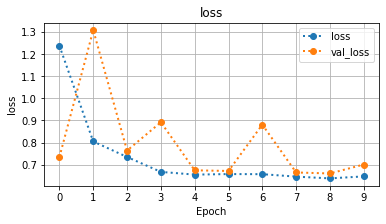

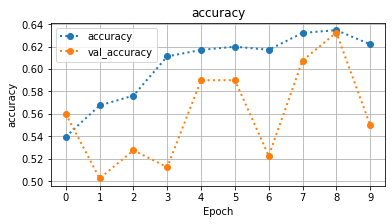

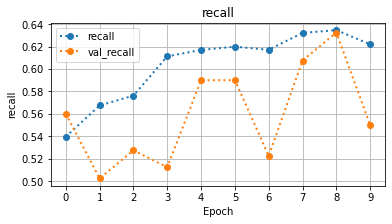

	[i] EVALUATING MODEL

	Training loss: 0.653
	Training accuracy: 0.605
	Training recall: 0.605

	Test loss: 0.665
	Test accuracy: 0.596
	Test recall: 0.596


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.79      0.29      0.42      4000
           1       0.56      0.92      0.70      4000

    accuracy                           0.60      8000
   macro avg       0.68      0.60      0.56      8000
weighted avg       0.68      0.60      0.56      8000




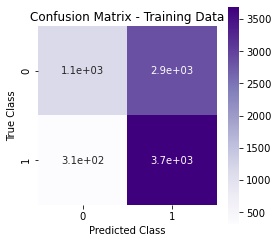




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.74      0.29      0.42       800
           1       0.56      0.90      0.69       800

    accuracy                           0.60      1600
   macro avg       0.65      0.60      0.55      1600
weighted avg       0.65      0.60      0.55      1600




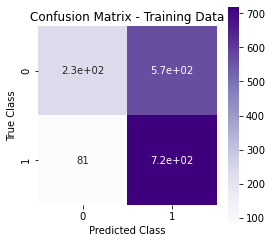

In [132]:
# evaluate_scores(model_1,X_train_unrow,y_train)
# classification_report_cm(model_1,X_train_unrow,y_train)

evaluate_network_v2(model_1, X_test_unrow,y_test,cm_figsize=(4,4),
                    history=history,history_figsize=(6,3),normalize=None,
                 X_train = X_train_unrow, y_train = y_train,cmap='Purples')

In [134]:
# plot_history(history,model_1)

### Combine the Whole Process Into One Func

In [ ]:
def make_fit_plot_model(build_fn=make_model, epochs=10,
                        fit_kws={'batch_size':32}):
    model_1 = build_fn()
    
    history = model_1.fit(X_train_unrow,y_train,epochs=epochs,**fit_kws,
                          validation_data=(X_val_unrow,y_val),
                         )
    plot_history(history)
    plt.show()
    
    y_hat_test = model_1.predict(X_test_unrow).round()
    print(metrics.classification_report(y_test,y_hat_test))
    
    ## Get and PLot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_hat_test,
                                normalize='true')

    ax = sns.heatmap(cm, cmap='Blues',annot=True,square=True)
    ax.set(xlabel='Predicted Class',ylabel='True Class')    
    return model_1


In [ ]:
# def make_model():
    
#     model_1 = Sequential()
#     model_1.add(Dense(64,activation='relu',
#                       input_shape=(X_train_unrow.shape[1],)))
    
#     model_1.add(Dense(32,activation='relu'))
    
#     model_1.add(Dense(1,activation='sigmoid'))
#     model_1.compile(optimizer='adam',loss='binary_crossentropy',
#                     metrics=['accuracy'])#,tf.keras.metrics.Recall()])
#     display(model_1.summary())
#     return model_1


model = make_fit_plot_model(make_model,epochs=20)

In [ ]:
pd.Series(y_train).value_counts(1)

> Combining all required params for this cell

## Activity: Ok...so now what??

> Using the rules of thumb and your own knowledge/research, attempt several methods to improve the results of the model. 

In [ ]:
def make_model():
    model_1 = Sequential()
    model_1.add(Dense(64,activation='relu',
                      input_shape=(X_train_unrow.shape[1],)))
    model_1.add(Dense(32,activation='relu'))
    model_1.add(layers.Dense(16,activation='relu'))
    model_1.add(layers.Dropout(0.3))

    model_1.add(Dense(1,activation='sigmoid'))
    model_1.compile(optimizer='rmsprop',loss='binary_crossentropy',
                    metrics=['accuracy'])#,tf.keras.metrics.Recall()])
    display(model_1.summary())
    return model_1

model_3 = make_fit_plot_model(make_model,epochs=20)

## Loading Data with ImageDataGenerator [Using 2D images]


In [ ]:
#### EFFICIENT USE OF IMAGEDATAGENERATOR - LOADS DATA AS NEEDED
## Image Dataset Settings
VAL_SPLIT = 0.2 
IMG_SIZE = (128,128)
BATCH_SIZE = 32

## Image Folderpaths
BASE_FOLDER = "/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"
train_folder = BASE_FOLDER+"training_set/"
test_folder = BASE_FOLDER+"test_set/"



## Create ImageDataGenerator for training data - can add augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)#,
#                                    shear_range = 0.2, zoom_range = 0.2,
#                                    horizontal_flip = True)



### Use generators flow_from_directory train_set
train_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size=IMG_SIZE,
                                                   batch_size=BATCH_SIZE
#                                                       class_mode='binary'
                                             )                                                  


## Create ImageDataaGenerator for validation and test data - NO AUGMENTATION!
test_val_datagen = ImageDataGenerator(rescale = 1./255,
                                      validation_split=VAL_SPLIT)


## Makng a Test Set and validation set from the same folder.
test_set = test_val_datagen.flow_from_directory(test_folder,
                                                     target_size=IMG_SIZE,
                                                     subset='training',
                                                     batch_size=BATCH_SIZE,
#                                                     class_mode='binary'
                                               )

val_set = test_val_datagen.flow_from_directory(test_folder,target_size=IMG_SIZE,
                                                   subset='validation',
                                                    batch_size=BATCH_SIZE,
#                                                    class_mode='binary'
                                              )

In [ ]:
# ## Check Classes
# print(train_set.class_indices)
# train_set.labels

In [ ]:
# train_set.target_size

In [ ]:
# ## Get number of classes for final layer
# ex_X, ex_y = next(train_set)
# print(ex_y.shape)

# nclasses = ex_y.shape[1]
# n_classes

In [ ]:
# def make_model(activation='relu'):#tf.keras.layers.LeakyReLU()):
#     model_1 = Sequential()
#     model_1.add(Dense(64,activation=activation,
#                       input_shape=(X_train_unrow.shape[1],)))
#     model_1.add(Dense(32,activation=activation))
# #     model_1.add(layers.Dropout(0.3))

#     model_1.add(layers.Dense(16,activation=activation))

#     model_1.add(Dense(1,activation='sigmoid'))
#     model_1.compile(optimizer='adam',loss='binary_crossentropy',
#                     metrics=['accuracy'])#,tf.keras.metrics.Recall()])
#     display(model_1.summary())
#     return model_1

# model_3 = make_fit_plot_model(make_model,epochs=20)

# APPENDIX/FOR TOMORROW

## HyperParameter Tuning with GridSearchCV & Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    

```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```    

2. We then create out model using the Keras wrapper:

```python
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

In [ ]:
# class Timer():
#     ## def init
#     def __init__(self,format_="%m/%d/%y - %I:%M %p"):
#         import tzlocal
#         self.tz = tzlocal.get_localzone()
#         self.fmt = format_
        
#         self.created_at = self.get_time()# get time
        
    
#     ## def get time method
#     def get_time(self):
#         import datetime as dt
#         return dt.datetime.now(self.tz)

#     ## def start
#     def start(self):
#         time = self.get_time()
#         self.start = time
#         print(f"[i] Timer started at{self.start.strftime(self.fmt)}")

        

#     ## def stop
#     def stop(self):
#         time = self.get_time()
#         self.end = time
#         print(f"[i] Timer ended at {self.end.strftime(self.fmt)}")
#         print(f"- Total time = {self.end-self.start}")

        
        
def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig



def plot_keras_history(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    """Plots keras history and returns fig"""
    ## Make a df from history
    plot_df = pd.DataFrame(history.history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


    ## Change xaxis locators 
    [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
    [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train_img[0].shape

In [ ]:
X_train_img.shape, y_train.shape

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

def create_checkpoint(monitor,model_subfolder=""):#='Datasets/Models/cat_vs_dog/'):
    filepath=model_subfolder+"weights-improvement-{epoch:02d}-{"+monitor+":.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_best_only=True, mode='max')
    return checkpoint

def create_early_stopping(monitor = 'val_accuracy',min_delta = 0.05, patience = 3,
                          verbose = 1, restore_best_weights = True):

    args = locals()
    earlystop = EarlyStopping(**args)
    return earlystop


def get_callbacks(early_stop_kws={}, checkpoint_kws={}):
    model_subfolder=BASE_FOLDER+'Models/'
    os.makedirs(model_subfolder,exist_ok=True)

    callbacks_list = [create_checkpoint('val_accuracy',
                                        model_subfolder=model_subfolder,**checkpoint_kws),
                      create_early_stopping(**early_stop_kws)]
    return callbacks_list

In [ ]:
def make_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(make_model)
model

In [ ]:
## Fit baseline model
timer = Timer()

timer.start()
history = model.fit(X_train_img, y_train, epochs=100, batch_size=64, 
                      validation_data=(X_val_img, y_val))
timer.stop()

In [ ]:
history

In [ ]:
        
def evaluate_model(y_true, y_pred,history=None):
    """Evaluates neural network using sklearn metrics"""
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
#     try:    
    if history is not None:
        plot_keras_history(history)
#     except:
#         pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")

        
        

In [ ]:
y_hat_test = model.predict(X_test_img)

evaluate_model(y_test,y_hat_test,history)

In [ ]:
def make_fit_evaluate_model(build_fn, fit_params = dict(epochs=100,
                                                        batch_size=64)):
    model = build_fn()
    
    timer = Timer()
    model.summary()
    timer.start()
    
    history = model.fit(X_train_img, y_train,**fit_params,
                          validation_data=(X_val_img, y_val))
    timer.stop()
    
    y_hat_test = model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test,history)
    return model,y_hat_test

In [ ]:
fit_model,model_preds = make_fit_evaluate_model(make_model)

## APPENDIX/HOW-TOs:

## How to Make a Custom Scoring Function

1. **Why would you do this?**
    1. You may want to use a metric that isn't available in sklearn. 
        - In the included `my_custom_scorer` function, I take the accuracy of each class's predictions from the diagonal of a normalized confusion matrix. 
        - I then calculate the mean of those 3 class accuracies, which is the `score` that is returned to the gridsearch. 
        
    2. You may want to add a printout or display to the scoring function so you can see the results as the search is going.
<br><br>
2. **How do you do write your own?**
    1. Define your custom scoring function.
        - It must accept `y_true`,`y_pred`
        - It must return a value to maximize. (like accuracy)
    2. You can add print or display commands to have the scoring function report the current results as the gridsearch is still going.
        - If you combine this with the example `create_model` function above that includes the `vars=locals(); print(vars)` command, then gridsearch will display:
            1. the parameters of each model (each time the `create_model` function is called.
            2. The score of each model, including a confusion matrix figure (each time it calls `my_custom_scorer`).
        
```python
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    ## Flatten one-hot encoded target columns into 1 column for sklearn functions
    if y_true.ndim>1 or y_pred.ndim>1:
        
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
     # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    
    # Get the mean of the diagonal values
    score = np.mean(diag)
    
    ## Display Results for the User
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot the confusion matrix.
    ji.plot_confusion_matrix(cm,normalize=True)

    # return the score 
    return score
```        
        
        
3. **How do you use it?**
    - When instantiating GridSearchCV pass your function as the `scoring=` parameter, wrapped in the  `sklearn.metrics.make_scorer` function.
  

```python
## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_test,
                   scoring=make_scorer(my_custom_scorer))
                    
grid_result = grid.fit(X_train, y_train)
```

### PROGRAMMATICALLTY MAKING SUBPLOTS (WIP)


In [ ]:
### PROGRAMMATICALLTY MAKING SUBPLOTS
num_metrics = len(model_1.metrics_names)

## Calculating subplot arrangmenet
ncols = 2

if num_metrics%ncols>0:
    nrows = num_metrics//ncols+1
else:
    nrows = num_metrics//ncols
    
fig,axes = plt.subplots(figsize=(ncols*5,nrows*4),nrows=nrows,ncols=ncols)
axes = axes.flatten()

for metric,ax in zip(mode1_1.metrics_names,axes):
    res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws,ax=ax)
    ax.set(xlabel='Epoch',ylabel=metric,title=metric)
    ax.grid()
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
#     plt.show()